#### Problem setup

Consider the following ODE system:
$$
\frac{d u_1}{dt} = a u_1 u_3,
\\\frac{d u_2}{dt} = b u_2 u_3,
\\\frac{d u_3}{dt} = c u_1^2 + d u_2^2,
$$
where $a, b, c, d$ are unknown variables, whose exact values are $1, -1, -1, 1$.

We infer them from data generated from two different initial conditions. In this case, the models are chosen to be two independent PINNs.

#### Mixture of single-taks learning and multi-task learning

$\textbf{Single-task perspective}$: the same ODE system; the same to-be-inferred model parameters

$\textbf{Multi-task perspective}$: two different problems in terms of PINNs (two ODEs; two datasets); two different solutions.

Information/model sharing.

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

In [2]:
data = sio.loadmat("./data/ko_data_1.mat")
t1_test = data["t"]
u1_test = data["y"]

t1_train = t1_test[::20]
u1_train = u1_test[::20]
f1_train = np.zeros_like(u1_train)

data = sio.loadmat("./data/ko_data_2.mat")
t2_test = data["t"]
u2_test = data["y"]

t2_train = t2_test[::20]
u2_train = u2_test[::20]
f2_train = np.zeros_like(u2_train)

In [3]:
model = models.Meta()

In [4]:
loss = model.train(
    t1_train, 
    f1_train, 
    t1_train, 
    u1_train, 
    t2_train, 
    f2_train, 
    t2_train, 
    u2_train, 
    niter=100000,
)

0 5.4792223
1000 1.5850235
2000 0.15279585
3000 0.03365057
4000 0.015764907
5000 0.005570997
6000 0.003569897
7000 0.0026202158
8000 0.0019024285
9000 0.0019364441
10000 0.0012654063
11000 0.0012294101
12000 0.0009991771
13000 0.00070832483
14000 0.0009427534
15000 0.0010787885
16000 0.0014075406
17000 0.00047386982
18000 0.00035229477
19000 0.0006631533
20000 0.00034631073
21000 0.0002599028
22000 0.00035613787
23000 0.00026517053
24000 0.00021806016
25000 0.0002230109
26000 0.0013111592
27000 0.00022943427
28000 0.00018188686
29000 0.00018767684
30000 0.00017502064
31000 0.00016741108
32000 0.00028018426
33000 0.0014070577
34000 0.0001801592
35000 0.0003915543
36000 0.0001237864
37000 0.00020351031
38000 0.0010137182
39000 0.00015247863
40000 0.00026482032
41000 0.00012786742
42000 0.00013109724
43000 0.00014863475
44000 0.0001313483
45000 0.0003002319
46000 9.371955e-05
47000 0.00030054283
48000 0.000110958725
49000 0.00026938145
50000 0.00038821658
51000 0.00012640993
52000 0.00020

In [5]:
model.restore()
u1_pred = model.nn_1(tf.constant(t1_test, tf.float32)).numpy()
u2_pred = model.nn_2(tf.constant(t2_test, tf.float32)).numpy()

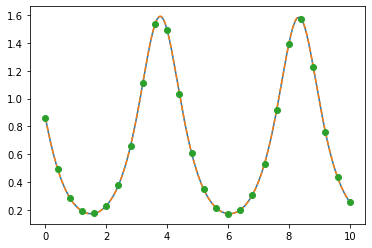

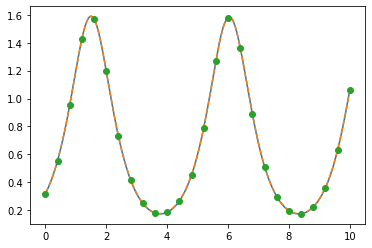

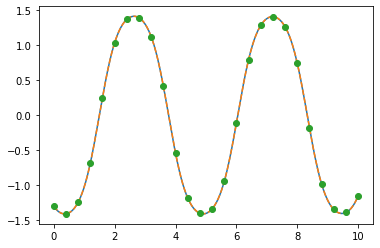

In [6]:
plt.plot(t1_test, u1_test[:, 0:1])
plt.plot(t1_test, u1_pred[:, 0:1], "--")
plt.plot(t1_train, u1_train[:, 0:1], "o")
plt.show()

plt.plot(t1_test, u1_test[:, 1:2])
plt.plot(t1_test, u1_pred[:, 1:2], "--")
plt.plot(t1_train, u1_train[:, 1:2], "o")
plt.show()

plt.plot(t1_test, u1_test[:, 2:3])
plt.plot(t1_test, u1_pred[:, 2:3], "--")
plt.plot(t1_train, u1_train[:, 2:3], "o")
plt.show()

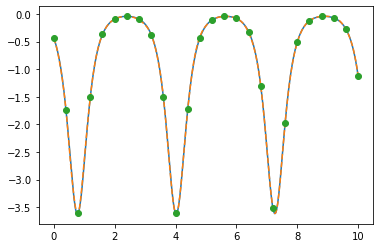

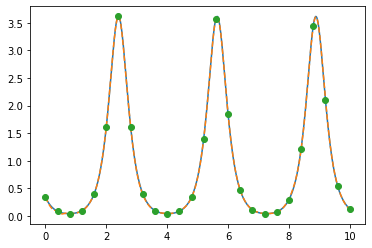

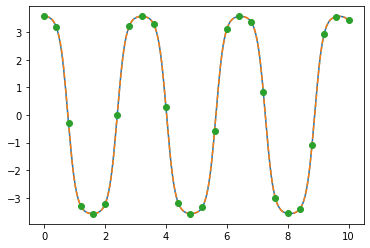

In [7]:
plt.plot(t2_test, u2_test[:, 0:1])
plt.plot(t2_test, u2_pred[:, 0:1], "--")
plt.plot(t2_train, u2_train[:, 0:1], "o")
plt.show()

plt.plot(t2_test, u2_test[:, 1:2])
plt.plot(t2_test, u2_pred[:, 1:2], "--")
plt.plot(t2_train, u2_train[:, 1:2], "o")
plt.show()

plt.plot(t2_test, u2_test[:, 2:3])
plt.plot(t2_test, u2_pred[:, 2:3], "--")
plt.plot(t2_train, u2_train[:, 2:3], "o")
plt.show()

In [8]:
print("a:", model.a.numpy())
print("b:", model.b.numpy())
print("c:", model.c.numpy())
print("d:", model.d.numpy())

a: 1.0018387
b: -0.9959469
c: -0.9964479
d: 0.99729496
